In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly_resampler.aggregation import MinMaxLTTB


import sys

sys.path.append("..")
from plotly_resampler import FigureResampler


USE_PNG = True  # Set to false to use dynamic plots


In [3]:
# Generate some data
x = np.arange(200_000)
sin = 3 + np.sin(x / 5000) + np.random.randn(len(x)) / 30

## Figures with multiple axes

### A single subplot with multiple axes

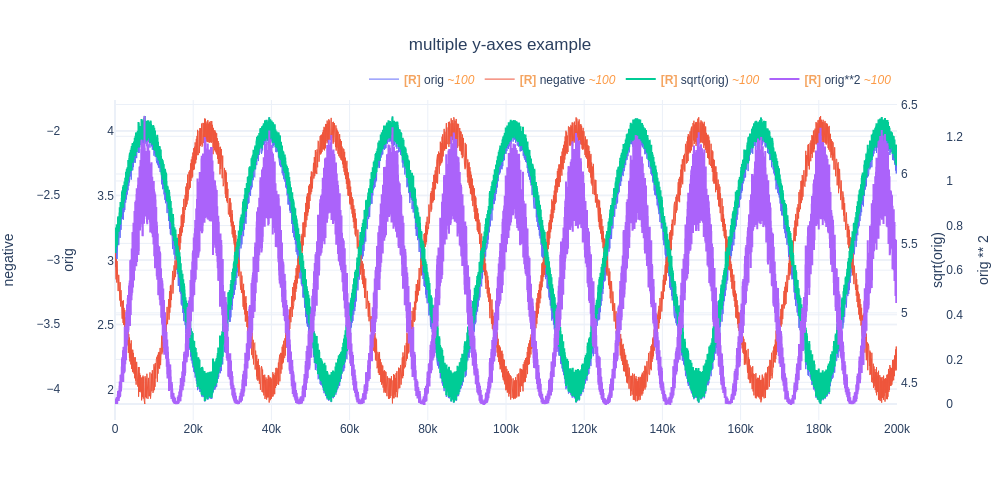

In [4]:
fig = FigureResampler(default_n_shown_samples=2000)
# all traces will be plotted against the same x-axis
# note: the first added trace its yaxis will be used as reference
fig.add_trace(go.Scatter(name="orig", yaxis="y1", line_width=1), hf_x=x, hf_y=sin)
fig.add_trace(go.Scatter(name="negative", yaxis="y2", line_width=1), hf_x=x, hf_y=-sin)
fig.add_trace(go.Scatter(name="sqrt(orig)", yaxis="y3"), hf_x=x, hf_y=np.sqrt(sin * 10))
fig.add_trace(go.Scatter(name="orig**2", yaxis="y4"), hf_x=x, hf_y=(sin - 3) ** 2)

# Update the axis
fig.update_layout(
    # NOTE: you can use the domain key to set the x-axis range (if you want to display)
    # the legend on the right instead of the top as done here
    xaxis=dict(domain=[0, 1]),
    # Add a title to the y-axis
    yaxis=dict(title="orig"),
    # by setting anchor=free, overlaying, and autoshift, the axis will be placed
    # automatically, without overlapping any other axes
    yaxis2=dict(
        title="negative",
        anchor="free",
        overlaying="y1",
        side="left",
        autoshift=True,
    ),
    yaxis3=dict(
        title="sqrt(orig)",
        anchor="free",
        overlaying="y1",
        side="right",
        autoshift=True,
    ),
    yaxis4=dict(
        title="orig ** 2",
        anchor="free",
        overlaying="y1",
        side="right",
        autoshift=True,
    ),
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    title_x=0.5,
    height=600,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
    template="plotly_white",
)

fig.show_dash()
if USE_PNG:
    fig.show(renderer="png", width=1000, height=500)

### Subplots - 2 rows, 1 column

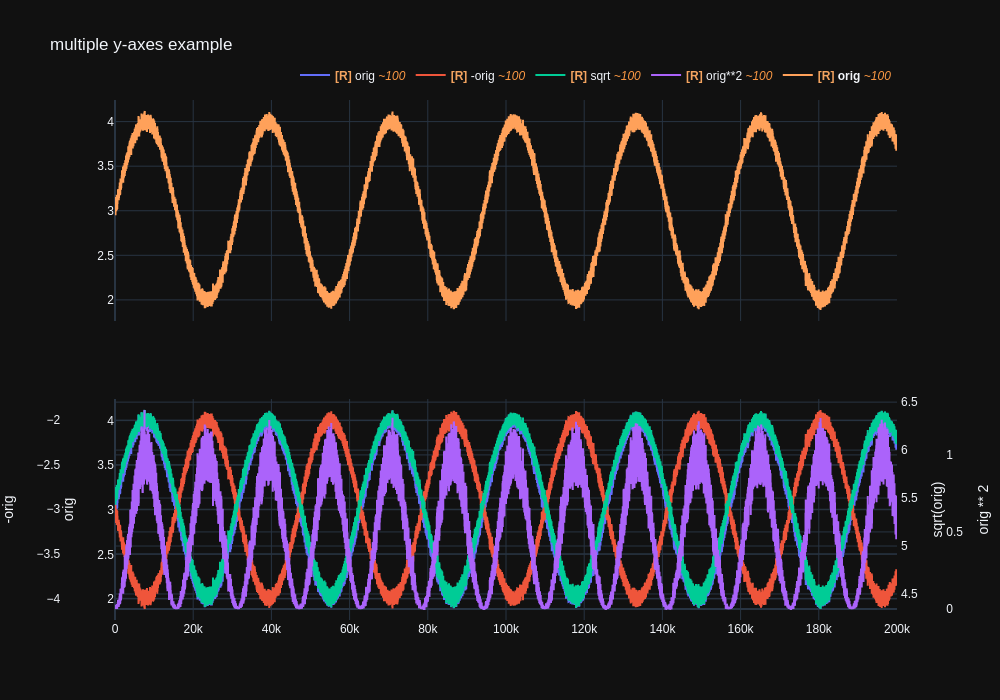

In [5]:
# create afigure with two rows
fig = FigureResampler(
    make_subplots(rows=2, cols=1, shared_xaxes=True),
    default_n_shown_samples=2000,
    default_downsampler=MinMaxLTTB(parallel=True),
)


# all traces will be plotted against the same x-axis
# note: the first added trace its yaxis will be used as reference
fig.add_trace(go.Scatter(name="orig"), hf_x=x, hf_y=sin, row=2, col=1)
fig.add_trace(go.Scatter(name="-orig"), hf_x=x, hf_y=-sin, row=2, col=1)
fig.add_trace(go.Scatter(name="sqrt"), hf_x=x, hf_y=np.sqrt(sin * 10), row=2, col=1)
fig.add_trace(go.Scatter(name="orig**2"), hf_x=x, hf_y=(sin - 3) ** 2, row=2, col=1)

# NOTE: because of the row and col specification, the yaxis is automatically set to y2
for i, data in enumerate(fig.data[1:], 3):
    data.update(yaxis=f"y{i}")

# add the original signal to the first row subplot
fig.add_trace(go.Scatter(name="<b>orig</b>"), row=1, col=1, hf_x=x, hf_y=sin)

# in order for autoshift to work, you need to set x-anchor to free
fig.update_layout(
    xaxis2=dict(domain=[0, 1], anchor="y2"),
    yaxis2=dict(title="orig"),
    yaxis3=dict(
        title="-orig",
        anchor="free",
        overlaying="y2",
        side="left",
        autoshift=True,
    ),
    yaxis4=dict(
        title="sqrt(orig)",
        anchor="free",
        overlaying="y2",
        side="right",
        autoshift=True,
    ),
    yaxis5=dict(
        title="orig ** 2",
        anchor="free",
        overlaying="y2",
        side="right",
        autoshift=True,
    ),
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    height=700,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
    template="plotly_dark",
)

fig.show_dash()
if USE_PNG:
    fig.show(renderer="png", width=1000, height=700)


### Subplots - 1 row, 2 columns

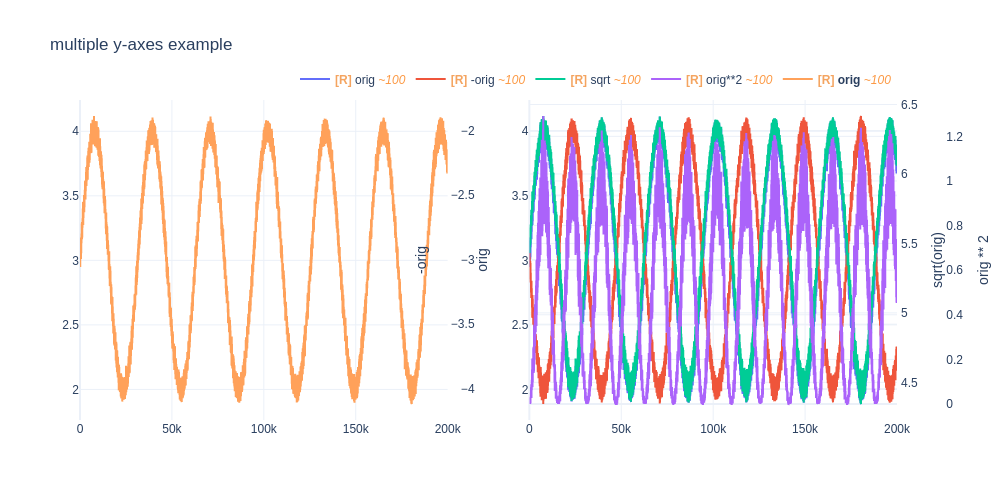

In [6]:
# create afigure with two rows
fig = FigureResampler(make_subplots(rows=1, cols=2), default_n_shown_samples=2000)


# all traces will be plotted against the same x-axis
# note: the first added trace its yaxis will be used as reference
fig.add_trace(go.Scatter(name="orig"), hf_x=x, hf_y=sin, row=1, col=2)
fig.add_trace(go.Scatter(name="-orig"), hf_x=x, hf_y=-sin, row=1, col=2)
fig.add_trace(go.Scatter(name="sqrt"), hf_x=x, hf_y=np.sqrt(sin * 10), row=1, col=2)
fig.add_trace(go.Scatter(name="orig**2"), hf_x=x, hf_y=(sin - 3) ** 2, row=1, col=2)

# NOTE: because of the row and col specification, the yaxis is automatically set to y2
for i, data in enumerate(fig.data[1:], 3):
    data.update(yaxis=f"y{i}")

# add the original signal to the first row subplot
fig.add_trace(go.Scatter(name="<b>orig</b>"), row=1, col=1, hf_x=x, hf_y=sin)

# in order for autoshift to work, you need to set x-anchor to free
fig.update_layout(
    # xaxis2=dict(domain=[0, 1], anchor="y2"),
    yaxis2=dict(title="orig"),
    yaxis3=dict(
        title="-orig",
        anchor="free",
        overlaying="y2",
        side="left",
        autoshift=True,
    ),
    yaxis4=dict(
        title="sqrt(orig)",
        anchor="free",
        overlaying="y2",
        side="right",
        autoshift=True,
    ),
    yaxis5=dict(
        title="orig ** 2",
        anchor="free",
        overlaying="y2",
        side="right",
        autoshift=True,
    ),
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    height=500,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
    template="plotly_white",
)

fig.show_dash()
if USE_PNG:
    fig.show(renderer="png", width=1000, height=500)
